<a href="https://colab.research.google.com/github/paramjeetsharma/Machine_Learning/blob/master/Credit_Upselling_CC_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/aritrase/crosssell-target-the-right-customer/activity

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import uniform, powerlaw, logistic

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
df=pd.read_csv('/gdrive/My Drive/train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,19,21,23,26,28,29,30,32,82,83,85,91,269,325,326,327,328) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,OCCUP_ALL_NEW,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,BL_TAG,TWL_TAG,PL_TAG,AL_CNC_TAG,AGRI_TAG,CE_TAG,CV_TAG,EDU_TAG,TL_TAG,OTHER_LOANS_TAG,LAP_TAG,LAS_TAG,EEG_TAG,BBG_TAG,HL_TAG,GL_TAG,AL_CLOSED,PL_CLOSED,BL_CLOSED,TWL_CLOSED,CV_CLOSED,LAP_CLOSED,LAS_CLOSED,EEG_CLOSED,BBG_CLOSED,GL_CLOSED,CC_HOLD_MON_03,CC_HOLD_MON_02,CC_HOLD_MON_01,CC_ACTIVE_MON_03,CC_ACTIVE_MON_02,CC_ACTIVE_MON_01,...,CLOSED_DATE,CRED_NEED_SCORE,CC_SPEND_MON_03_ENT,CC_SPEND_MON_03_MED,CC_SPEND_MON_03_HMD,CC_SPEND_MON_03_HBY,CC_SPEND_MON_03_CARE,CC_SPEND_MON_03_TRL,CC_SPEND_MON_03_RST,CC_SPEND_MON_03_JER,CC_SPEND_MON_03_HTL,CC_SPEND_MON_03_ATM,CARD_AUTOMOBILE_MON_01,CARD_HOTEL_MON_01,CARD_JEWELLERY_MON_01,CARD_RESTAURANT_MON_01,CARD_TRAVEL_MON_01,CARD_PRSNL_CARE_MON_01,CARD_HOBBY_MON_01,CARD_HOME_DECOR_MON_01,CARD_MEDICAL_MON_01,CARD_ENTMNT_MON_01,SAL_MON_01,SAL_MON_02,SAL_MON_03,TOP_100_CORP,TOP_800_CORP,TOP_CORP_TAG,EOP_MON_02,EOP_MON_03,CREDIT_ACT,DEBIT_ACT,CEL_TAG,EL_TAG,AGL_TAG,CVL_TAG,AL_TAG,HL_EMI,SCRUB_EMI,RESPONDERS
0,385793,CSA,M,INDIVIDUAL,SALARIED,21,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,NaN,NaN,NONE,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,N
1,286891,CSA,M,INDIVIDUAL,SALARIED,23,8243.77,7.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,10754.0,8733.0,17154.0,NaN,NaN,NONE,3016.77,3.02,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,N
2,108751,CSA,M,INDIVIDUAL,SALARIED,41,26515.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,NaN,NaN,NONE,9999.00,14858.75,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,N
3,278651,CSA,M,INDIVIDUAL,SALARIED,28,65917.28,8270.28,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,Y,NaN,Y,...,NaN,0.247852,NaN,NaN,2558.0,NaN,NaN,NaN,NaN,8200.0,NaN,NaN,N,N,Y,N,N,Y,N,Y,Y,N,38952.0,15200.0,19605.0,NaN,NaN,NONE,27163.10,49675.27,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,N
4,23637,CSA,M,INDIVIDUAL,SALARIED,34,22260.94,6060.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,Y,Y,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,Y,N,0.0,0.0,0.0,NaN,NaN,NONE,21065.87,983.87,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,251.758794,N


In [0]:
df.replace(['',' ','NULL'],np.nan,inplace=True)

In [0]:
df.dropna(thresh=df.shape[0]*0.8,how='all',axis=1,inplace=True)

In [8]:
df.shape

(300000, 49)

In [9]:
df.isnull().sum()

CUSTOMER_ID                   0
ACT_TYPE                      0
GENDER                       87
LEGAL_ENTITY                  0
OCCUP_ALL_NEW                 0
AGE                           0
N_CASA_MAX_BALANCE_MTD        0
N_CASA_MIN_BALANCE_MTD        0
CC_HOLD                       0
CC_ACTIVE                     0
DC_HOLD                       0
DC_ACTIVE                     0
COC_ELIGIBLE                  0
EOP_BAL_MON_01                0
AMB_MON_04                 5622
AMB_MON_01                    0
AMB_MON_02                  992
AMB_MON_03                 2778
FINANCE_MON_01                0
JOBS_MON_01                   0
LIFESTYLE_MON_01              0
INMON_01KET_MON_01            0
TRAVEL_MON_01                 0
CHANNEL_CLICK_DISP            0
DESIGNATION_FINAL             0
TOP14_CITY                    0
TOP9_CITY                     0
PL2CC_ELIGIBLE                0
NEFT_CC_CATEGORY              0
NEFT_DC_CATEGORY              0
TPT_DC_CATEGORY_MON_01        0
TPT_CC_C

In [0]:
cols = df.columns

In [0]:
num_cols = df._get_numeric_data().columns

In [0]:
cat_cols=list(set(cols) - set(num_cols))

In [0]:
num_cols=list(num_cols)
num_cols.remove("CUSTOMER_ID")

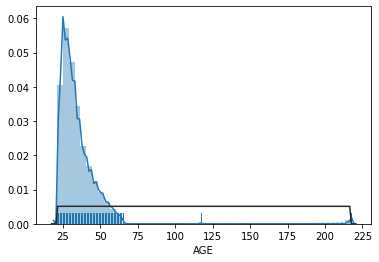

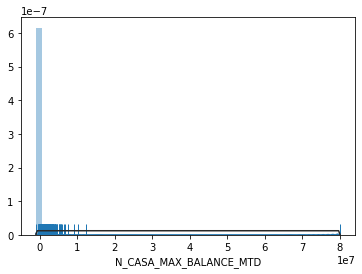

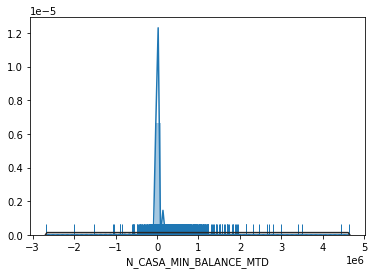

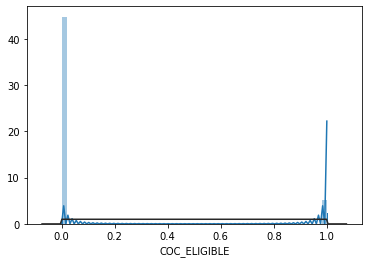

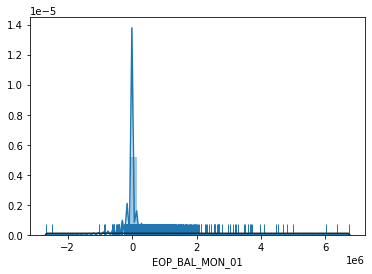

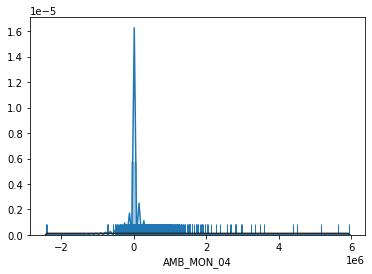

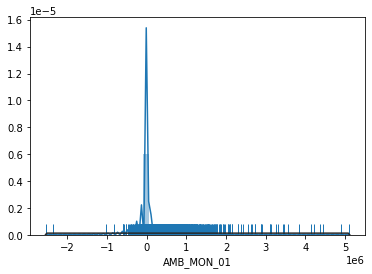

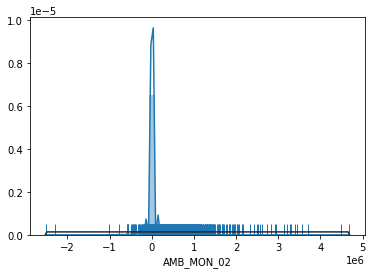

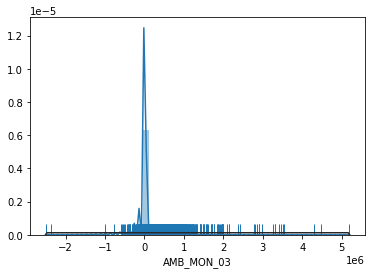

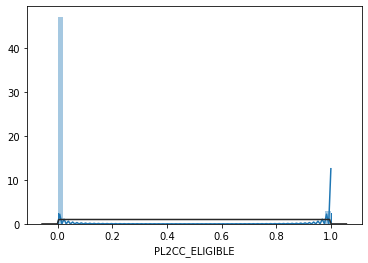

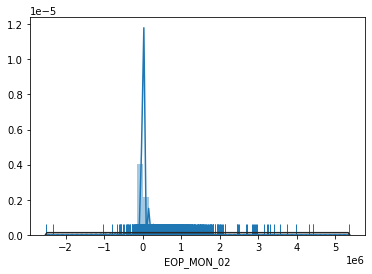

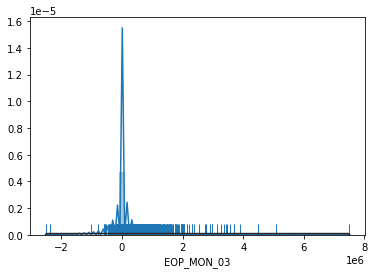

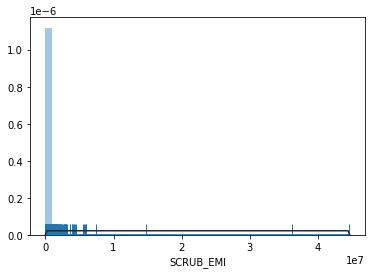

In [14]:
for i, col in enumerate(df[num_cols]):
   plt.figure(i)
   sns.distplot(df[col].dropna(), hist=True,label=col, rug=True,fit=uniform )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


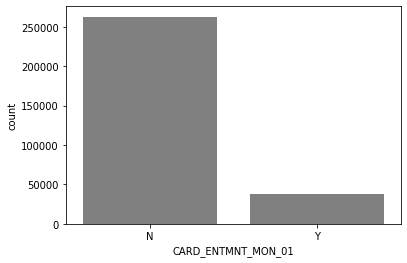

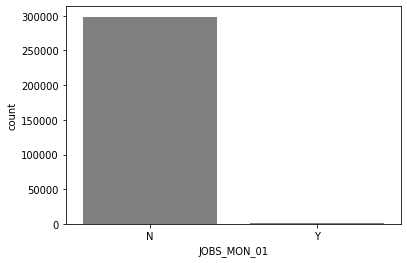

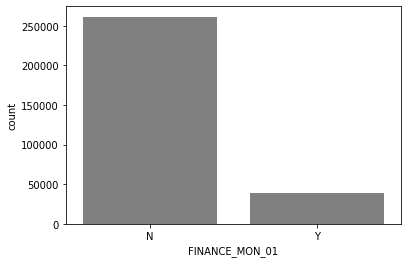

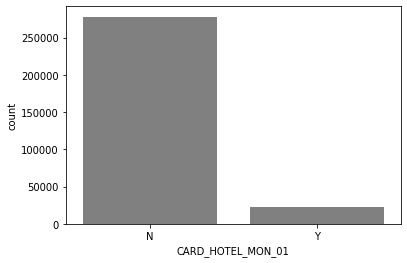

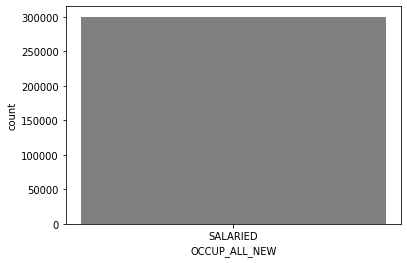

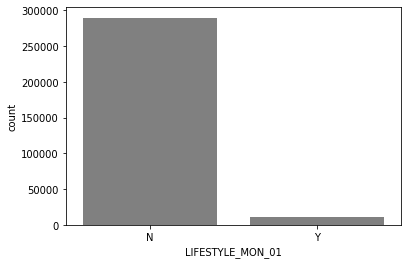

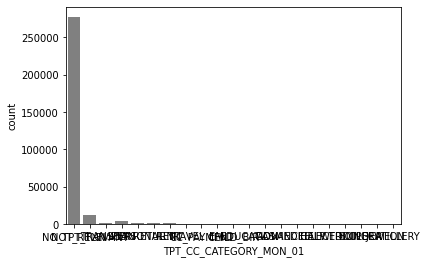

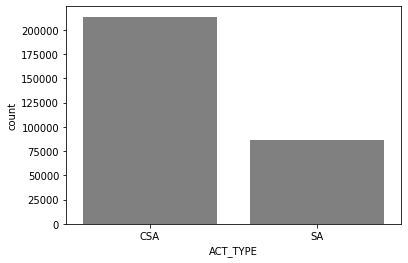

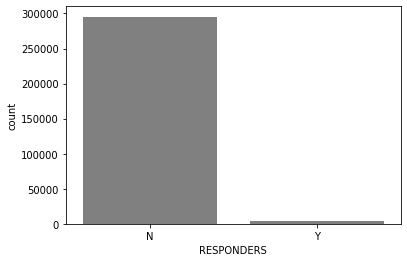

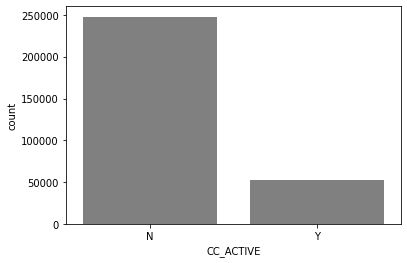

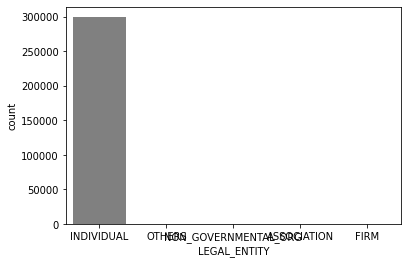

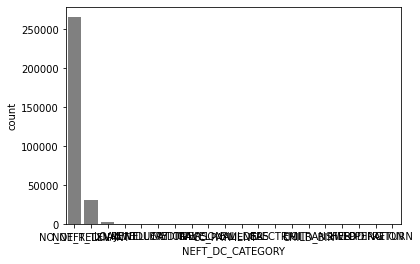

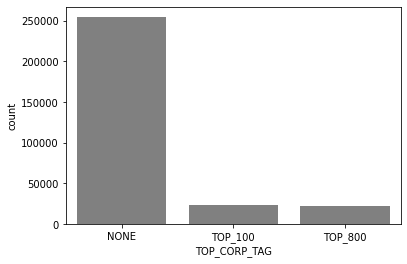

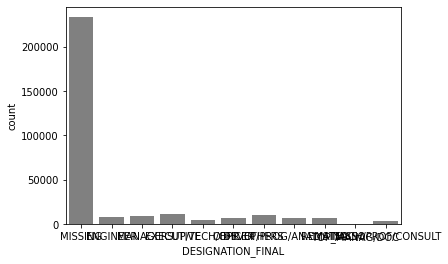

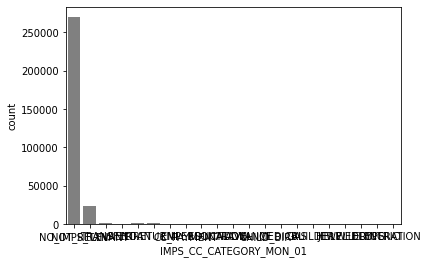

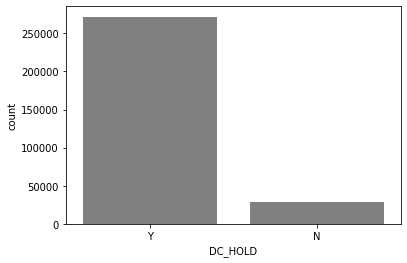

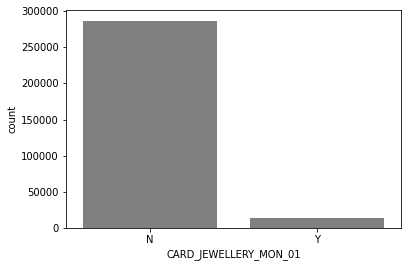

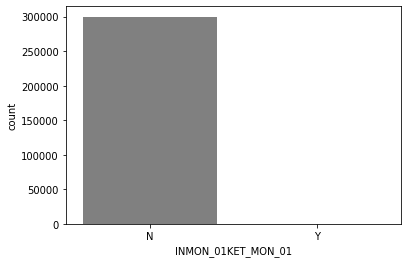

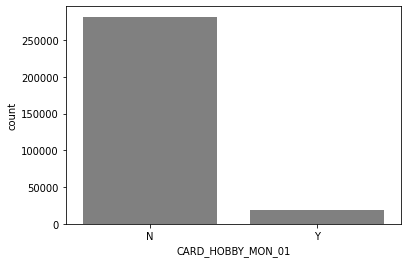

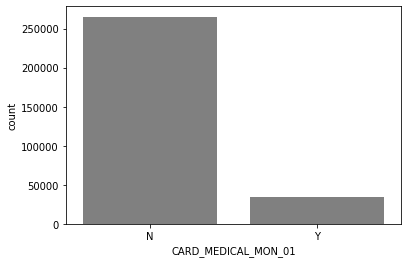

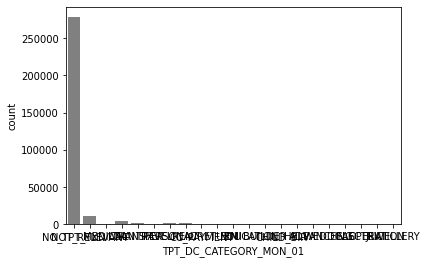

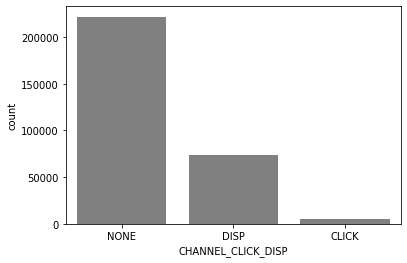

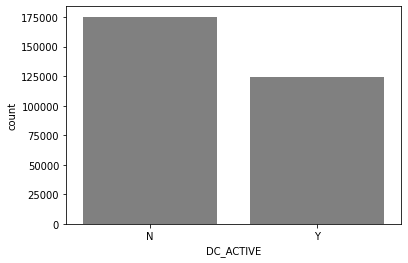

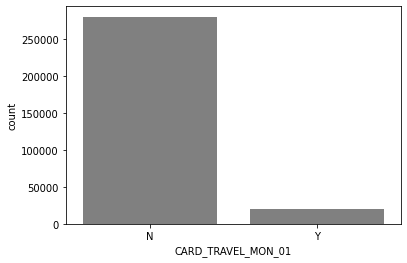

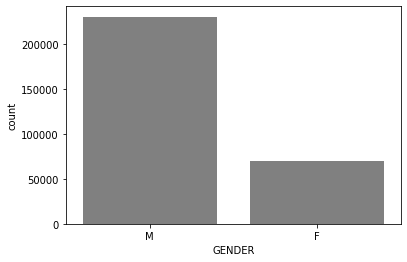

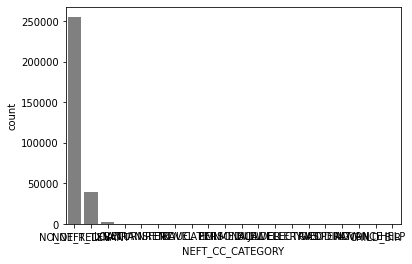

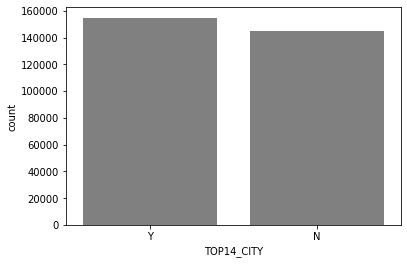

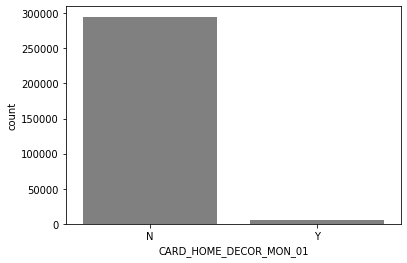

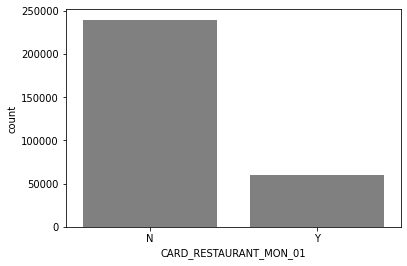

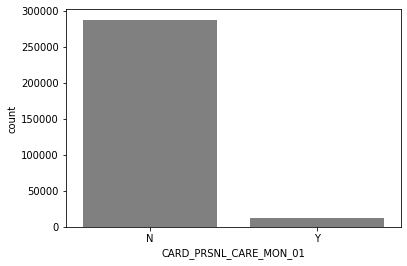

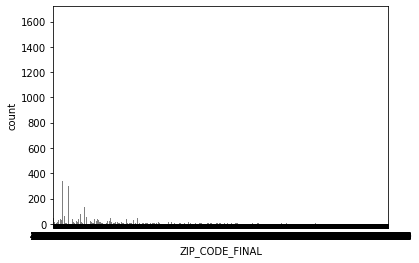

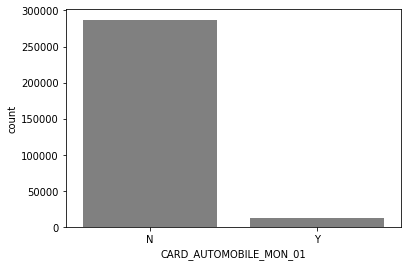

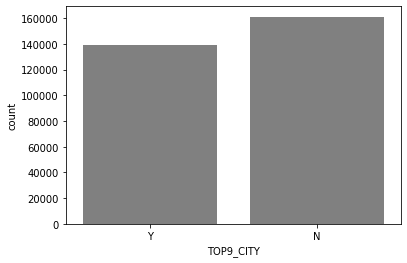

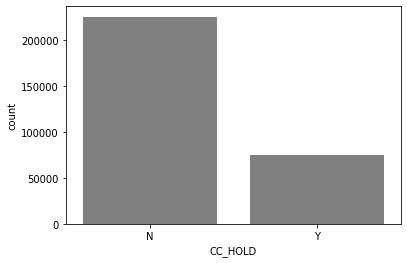

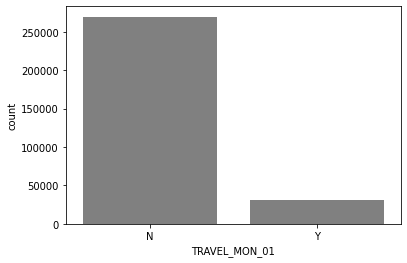

In [15]:
for i, col in enumerate(df[cat_cols]):
   plt.figure(i)
   sns.countplot(df[col],color='gray')

In [17]:

df[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,300000.0,34.111603,14.981995,21.00,26.00,31.000,38.000000,217.00
N_CASA_MAX_BALANCE_MTD,300000.0,34420.476661,177738.981986,-1019282.58,8.00,11066.630,34286.407500,80026590.72
N_CASA_MIN_BALANCE_MTD,300000.0,10432.440376,47066.016085,-2681018.01,0.00,72.235,4432.057500,4638099.45
COC_ELIGIBLE,300000.0,0.104987,0.306537,0.00,0.00,0.000,0.000000,1.00
EOP_BAL_MON_01,300000.0,23082.951515,76349.271447,-2675529.86,4.00,2048.625,20934.487500,6738965.72
AMB_MON_04,294378.0,20597.589876,61134.342963,-2415101.18,3.00,4481.380,19524.487500,5942244.48
AMB_MON_01,300000.0,19697.308678,65867.557731,-2533013.41,5.00,3015.050,16079.890000,5099563.25
AMB_MON_02,299008.0,19649.655041,62232.285612,-2511006.86,3.00,3050.745,16584.040000,4676654.36
AMB_MON_03,297222.0,19661.200885,60818.147540,-2495496.27,3.23,3263.715,17254.805000,5191553.01
PL2CC_ELIGIBLE,300000.0,0.059233,0.236061,0.00,0.00,0.000,0.000000,1.00


In [18]:
df[cat_cols].astype('object').describe().transpose()


,count,unique,top,freq
CARD_ENTMNT_MON_01,300000,2,N,262677
JOBS_MON_01,300000,2,N,298493
FINANCE_MON_01,300000,2,N,261465
CARD_HOTEL_MON_01,300000,2,N,277778
OCCUP_ALL_NEW,300000,1,SALARIED,300000
LIFESTYLE_MON_01,300000,2,N,289536
TPT_CC_CATEGORY_MON_01,300000,21,NO_TPT_TXN,277423
ACT_TYPE,300000,2,CSA,213385
RESPONDERS,300000,2,N,295388
CC_ACTIVE,300000,2,N,247782


In [0]:
#Removing Unwanted Cols
df.drop(['ZIP_CODE_FINAL', 'DESIGNATION_FINAL','INMON_01KET_MON_01','LEGAL_ENTITY'], axis = 1,inplace=True) 

In [0]:
cat_cols.remove('ZIP_CODE_FINAL')
cat_cols.remove('DESIGNATION_FINAL')
cat_cols.remove('INMON_01KET_MON_01')
cat_cols.remove('LEGAL_ENTITY')
cat_cols.remove('RESPONDERS')

In [0]:
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)
#df['GENDER'].apply(lambda x: x.fillna(x.mode, inplace=True))

In [0]:
 df['AMB_MON_03'].fillna(np.mean(df[['AMB_MON_04', 'AMB_MON_02','AMB_MON_01']],axis=1),inplace=True)    

In [0]:
 df['AMB_MON_02'].fillna(np.mean(df[['AMB_MON_04', 'AMB_MON_03','AMB_MON_01']],axis=1),inplace=True)                 

In [0]:
df.AMB_MON_04.fillna(np.mean(df[['AMB_MON_02', 'AMB_MON_03','AMB_MON_01']],axis=1),inplace=True)

In [0]:
df.EOP_MON_02.fillna(df['EOP_MON_03'],inplace=True)

In [0]:
df.EOP_MON_03.fillna(df['EOP_MON_02'],inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CUSTOMER_ID              300000 non-null  int64  
 1   ACT_TYPE                 300000 non-null  object 
 2   GENDER                   300000 non-null  object 
 3   OCCUP_ALL_NEW            300000 non-null  object 
 4   AGE                      300000 non-null  int64  
 5   N_CASA_MAX_BALANCE_MTD   300000 non-null  float64
 6   N_CASA_MIN_BALANCE_MTD   300000 non-null  float64
 7   CC_HOLD                  300000 non-null  object 
 8   CC_ACTIVE                300000 non-null  object 
 9   DC_HOLD                  300000 non-null  object 
 10  DC_ACTIVE                300000 non-null  object 
 11  COC_ELIGIBLE             300000 non-null  int64  
 12  EOP_BAL_MON_01           300000 non-null  float64
 13  AMB_MON_04               300000 non-null  float64
 14  AMB_

In [0]:
df.EOP_MON_02.fillna(0,inplace=True)
df.EOP_MON_03.fillna(0,inplace=True)
#df.to_excel("C:/Users/paramjeet.kumar/Downloads/crosssell-target-the-right-customer/final3.xlsx")

In [0]:
for i, col in enumerate(num_cols):
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col] = np.clip(df[col], percentiles[0], percentiles[1])

In [0]:
#for i, col in enumerate(num_cols):
 #   percentiles = df[col].quantile([0.01,0.99]).values
  #  df[col][df[col] <= percentiles[0]] = percentiles[0]
   # df[col][df[col] >= percentiles[1]] = percentiles[1]

In [0]:
df['TARGET'] = df['RESPONDERS'].map(dict(Y=1, N=0))


In [0]:
Woe_col=num_cols+cat_cols

In [33]:
import woe.feature_process as fp
import woe.eval as eval
 
#%% woe bin, iv and transform
data = df[Woe_col] # is used to store the woe value of all data
data['target']=df['TARGET']
data_woe=pd.DataFrame()
civ_list = []
n_positive = sum(data['target'])
n_negtive = len(data) - n_positive
for column in Woe_col:
    if data[column].dtypes == 'object':
        civ = fp.proc_woe_discrete(data, column, n_positive, n_negtive, 0.05*len(data), alpha=0.05)
    else:            
        civ = fp.proc_woe_continuous(data, column, n_positive, n_negtive, 0.05*len(data), alpha=0.05)
    civ_list.append(civ)
    data_woe[column] = fp.woe_trans(data[column], civ)
    
civ_df = eval.eval_feature_detail(civ_list)
# Delete iv value too small variable
iv_thre = 0.001
iv = civ_df[['var_name','iv']].drop_duplicates()
iv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


--------------process continuous variable:AGE---------------
-----process continuous variable:N_CASA_MAX_BALANCE_MTD-----
-----process continuous variable:N_CASA_MIN_BALANCE_MTD-----
----------process continuous variable:COC_ELIGIBLE----------
---------process continuous variable:EOP_BAL_MON_01---------
-----------process continuous variable:AMB_MON_04-----------
-----------process continuous variable:AMB_MON_01-----------
-----------process continuous variable:AMB_MON_02-----------
-----------process continuous variable:AMB_MON_03-----------
---------process continuous variable:PL2CC_ELIGIBLE---------
-----------process continuous variable:EOP_MON_02-----------
-----------process continuous variable:EOP_MON_03-----------
-----------process continuous variable:SCRUB_EMI------------
--------process discrete variable:CARD_ENTMNT_MON_01--------


/usr/local/lib/python3.6/dist-packages/woe/feature_process.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = cpvar


-----------process discrete variable:JOBS_MON_01------------
----------process discrete variable:FINANCE_MON_01----------
--------process discrete variable:CARD_HOTEL_MON_01---------
----------process discrete variable:OCCUP_ALL_NEW-----------
---------process discrete variable:LIFESTYLE_MON_01---------
------process discrete variable:TPT_CC_CATEGORY_MON_01------
-------------process discrete variable:ACT_TYPE-------------
------------process discrete variable:CC_ACTIVE-------------
---------process discrete variable:NEFT_DC_CATEGORY---------
-----------process discrete variable:TOP_CORP_TAG-----------
-----process discrete variable:IMPS_CC_CATEGORY_MON_01------
-------------process discrete variable:DC_HOLD--------------
------process discrete variable:CARD_JEWELLERY_MON_01-------
--------process discrete variable:CARD_HOBBY_MON_01---------
-------process discrete variable:CARD_MEDICAL_MON_01--------
------process discrete variable:TPT_DC_CATEGORY_MON_01------
--------process discrete

,var_name,iv
0,AGE,4.500522e-02
0,N_CASA_MAX_BALANCE_MTD,6.675874e-01
0,N_CASA_MIN_BALANCE_MTD,1.424076e-01
0,COC_ELIGIBLE,4.006419e-02
0,EOP_BAL_MON_01,4.375579e-01
0,AMB_MON_04,5.421520e-01
0,AMB_MON_01,5.935652e-01
0,AMB_MON_02,5.573252e-01
0,AMB_MON_03,5.748114e-01
0,PL2CC_ELIGIBLE,1.706663e-02


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
X_train,X_test,y_train,y_test=train_test_split(data_woe,df['TARGET'],test_size=.3)

In [36]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (210000, 43)
Number transactions y_train dataset:  (210000,)
Number transactions X_test dataset:  (90000, 43)
Number transactions y_test dataset:  (90000,)


In [37]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 3256
Before OverSampling, counts of label '0': 206744 



In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 135225 to 258385
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGE                      210000 non-null  float64
 1   N_CASA_MAX_BALANCE_MTD   210000 non-null  float64
 2   N_CASA_MIN_BALANCE_MTD   210000 non-null  float64
 3   COC_ELIGIBLE             210000 non-null  float64
 4   EOP_BAL_MON_01           210000 non-null  float64
 5   AMB_MON_04               210000 non-null  float64
 6   AMB_MON_01               210000 non-null  float64
 7   AMB_MON_02               210000 non-null  float64
 8   AMB_MON_03               210000 non-null  float64
 9   PL2CC_ELIGIBLE           210000 non-null  float64
 10  EOP_MON_02               210000 non-null  float64
 11  EOP_MON_03               210000 non-null  float64
 12  SCRUB_EMI                210000 non-null  float64
 13  CARD_ENTMNT_MON_01       210000 non-null  float64
 14 

In [39]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [40]:

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (413488, 43)
After OverSampling, the shape of train_y: (413488,) 

After OverSampling, counts of label '1': 206744
After OverSampling, counts of label '0': 206744


In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [42]:
#1. import the class/model
from sklearn.ensemble import RandomForestClassifier
#build the classifier

clf = RandomForestClassifier()
#train the classifier

clf.fit(X_train_res, y_train_res.ravel())

#test the classifier
clf.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0])

In [43]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp


N_CASA_MAX_BALANCE_MTD     0.090116
AGE                        0.087527
AMB_MON_04                 0.071222
AMB_MON_03                 0.063015
TOP14_CITY                 0.062745
AMB_MON_01                 0.053913
TOP9_CITY                  0.052972
SCRUB_EMI                  0.050544
AMB_MON_02                 0.045684
EOP_BAL_MON_01             0.041797
EOP_MON_02                 0.038841
EOP_MON_03                 0.035563
N_CASA_MIN_BALANCE_MTD     0.030462
GENDER                     0.030276
CC_ACTIVE                  0.026319
CC_HOLD                    0.025065
ACT_TYPE                   0.019685
CHANNEL_CLICK_DISP         0.018844
DC_ACTIVE                  0.015000
COC_ELIGIBLE               0.014684
FINANCE_MON_01             0.012860
PL2CC_ELIGIBLE             0.012437
TOP_CORP_TAG               0.011433
NEFT_CC_CATEGORY           0.011037
CARD_MEDICAL_MON_01        0.007383
CARD_RESTAURANT_MON_01     0.007271
TRAVEL_MON_01              0.006526
CARD_ENTMNT_MON_01         0

In [0]:
imp_var=['N_CASA_MAX_BALANCE_MTD',
'AGE',
'AMB_MON_04',
'AMB_MON_03',
'TOP14_CITY',
'AMB_MON_01',
'TOP9_CITY',
'SCRUB_EMI',
'AMB_MON_02',
'EOP_BAL_MON_01',
'EOP_MON_02',
'EOP_MON_03',
'N_CASA_MIN_BALANCE_MTD',
'GENDER',
'CC_ACTIVE',
'CC_HOLD',
'ACT_TYPE',
'CHANNEL_CLICK_DISP',
'DC_ACTIVE',
'COC_ELIGIBLE',
'FINANCE_MON_01',
'PL2CC_ELIGIBLE'
]

In [0]:
X_trainRF,X_testRF,y_trainRF,y_testRF=train_test_split(data_woe[imp_var],df['TARGET'],test_size=.3)
X_trainRF_res, y_trainRF_res = sm.fit_sample(X_trainRF, y_trainRF.ravel())


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_trainRF_res, y_trainRF_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Recall metric in the testing dataset: 76.56695156695157%


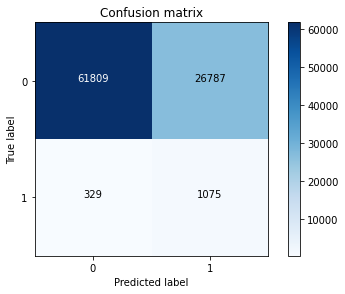

In [79]:

cnf_matrix = confusion_matrix(y_testRF, logreg.predict(X_testRF))

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [80]:

y_predRF = logreg.predict(X_testRF)
from sklearn.metrics import classification_report
print(classification_report(y_testRF, y_predRF))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82     88596
           1       0.04      0.77      0.07      1404

    accuracy                           0.70     90000
   macro avg       0.52      0.73      0.45     90000
weighted avg       0.98      0.70      0.81     90000



In [0]:
#For RF Change Catogrical variable to WOE and Numerical with Satandard Scalar
def WOE(var):
    df[var] = df[var].fillna('NoData')
    k = df[[var,'TARGET']].groupby(var)['TARGET'].agg(['count','sum']).reset_index()
    k.columns = [var,'Count','Good']
    k['Bad'] = k['Count'] - k['Good']
    k['Good %'] = (k['Good'] / k['Good'].sum()*100)+0.5
    k['Bad %'] = (k['Bad'] / k['Bad'].sum()*100)+0.5
    k[var+'_WOE'] = np.log(k['Good %'] / k['Bad %'])
    k = k.sort_values(by=var+'_WOE')
    df2 = pd.merge(df[['TARGET',var]],k[[var,var+'_WOE']],
    left_on=var,
    right_on=var,how='left')
    return(df2)


In [0]:
df2=pd.DataFrame()
df2['TARGET']=df['TARGET']

In [83]:
for i in cat_cols:
    print (i)
    df2=pd.concat([df2, WOE(i)], axis=1)
df4=df2.filter(regex='WOE')

CARD_ENTMNT_MON_01
JOBS_MON_01
FINANCE_MON_01
CARD_HOTEL_MON_01
OCCUP_ALL_NEW
LIFESTYLE_MON_01
TPT_CC_CATEGORY_MON_01
ACT_TYPE
CC_ACTIVE
NEFT_DC_CATEGORY
TOP_CORP_TAG
IMPS_CC_CATEGORY_MON_01
DC_HOLD
CARD_JEWELLERY_MON_01
CARD_HOBBY_MON_01
CARD_MEDICAL_MON_01
TPT_DC_CATEGORY_MON_01
CHANNEL_CLICK_DISP
DC_ACTIVE
CARD_TRAVEL_MON_01
GENDER
NEFT_CC_CATEGORY
TOP14_CITY
CARD_HOME_DECOR_MON_01
CARD_RESTAURANT_MON_01
CARD_PRSNL_CARE_MON_01
CARD_AUTOMOBILE_MON_01
TOP9_CITY
CC_HOLD
TRAVEL_MON_01


In [0]:
df3=df[num_cols]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df3)
scaled_features_df = pd.DataFrame(scaled_data, index=df3.index, columns=df3.columns)

In [0]:
Df_Model=pd.DataFrame()
Df_Model=pd.concat([scaled_features_df,df4],axis=1)

In [0]:
X_trainRFM,X_testRFM,y_trainRFM,y_testRFM=train_test_split(Df_Model,df['TARGET'],test_size=.3)

In [88]:
X_trainRFM_res, y_trainRFM_res = sm.fit_sample(X_trainRFM, y_trainRFM.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_trainRFM_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_trainRFM_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_trainRFM_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_trainRFM_res==0)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (413460, 43)
After OverSampling, the shape of train_y: (413460,) 

After OverSampling, counts of label '1': 206730
After OverSampling, counts of label '0': 206730


In [95]:
clf.fit(X_trainRFM_res, y_trainRFM_res.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
feature_imp = pd.Series(clf.feature_importances_,index=X_trainRFM.columns).sort_values(ascending=False)
feature_imp

TOP9_CITY_WOE                  0.077127
TOP14_CITY_WOE                 0.074938
SCRUB_EMI                      0.071146
AMB_MON_04                     0.058338
AGE                            0.047664
N_CASA_MAX_BALANCE_MTD         0.045362
ACT_TYPE_WOE                   0.039810
N_CASA_MIN_BALANCE_MTD         0.039123
AMB_MON_03                     0.037893
GENDER_WOE                     0.036805
AMB_MON_01                     0.035172
AMB_MON_02                     0.035100
CC_ACTIVE_WOE                  0.034123
CHANNEL_CLICK_DISP_WOE         0.030956
EOP_MON_02                     0.028658
EOP_BAL_MON_01                 0.028226
DC_ACTIVE_WOE                  0.026822
EOP_MON_03                     0.025529
NEFT_CC_CATEGORY_WOE           0.023465
TOP_CORP_TAG_WOE               0.021409
CC_HOLD_WOE                    0.016509
FINANCE_MON_01_WOE             0.016035
CARD_MEDICAL_MON_01_WOE        0.015145
IMPS_CC_CATEGORY_MON_01_WOE    0.012864
CARD_RESTAURANT_MON_01_WOE     0.012478


In [0]:
impRFM=['TOP9_CITY_WOE','TOP14_CITY_WOE','SCRUB_EMI','AMB_MON_04','AGE','N_CASA_MAX_BALANCE_MTD','ACT_TYPE_WOE','N_CASA_MIN_BALANCE_MTD',
'AMB_MON_03','GENDER_WOE','AMB_MON_01','AMB_MON_02','CC_ACTIVE_WOE','CHANNEL_CLICK_DISP_WOE','EOP_MON_02','EOP_BAL_MON_01',
'DC_ACTIVE_WOE','EOP_MON_03','NEFT_CC_CATEGORY_WOE','TOP_CORP_TAG_WOE','CC_HOLD_WOE','FINANCE_MON_01_WOE','CARD_MEDICAL_MON_01_WOE','IMPS_CC_CATEGORY_MON_01_WOE',
'CARD_RESTAURANT_MON_01_WOE','NEFT_DC_CATEGORY_WOE']


In [102]:

X_trainRFM2,X_testRFM2,y_trainRFM2,y_testRFM2=train_test_split(Df_Model[impRFM],df['TARGET'],test_size=.3)
X_trainRFM2_res, y_trainRFM2_res = sm.fit_sample(X_trainRFM2, y_trainRFM2.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_trainRFM2_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_trainRFM2_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_trainRFM2_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_trainRFM2_res==0)))

clf.fit(X_trainRFM2_res, y_trainRFM2_res.ravel())


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (413646, 26)
After OverSampling, the shape of train_y: (413646,) 

After OverSampling, counts of label '1': 206823
After OverSampling, counts of label '0': 206823


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:

cnf_matrix = confusion_matrix(y_testRFM2, clf.predict(X_testRFM2))
cnf_matrix

array([[88155,   410],
       [ 1406,    29]])

Recall metric in the testing dataset: 2.0209059233449476%


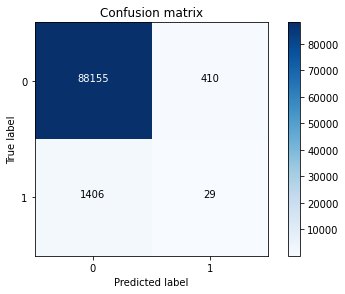

In [105]:

cnf_matrix = confusion_matrix(y_testRFM2, clf.predict(X_testRFM2))

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

NotFittedError: ignored

In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100],
    'max_features': [10,15,20],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
clr=RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
# Fit the grid search to the data
grid_search.fit(X_trainRFM2_res, y_trainRFM2_res.ravel())


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Recall metric in the testing dataset: 0.21367521367521367%


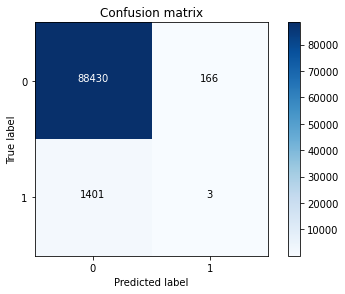

In [75]:
cnf_matrix = confusion_matrix(y_testRF, clf.predict(X_testRF))

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [0]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# generate dataset

In [0]:
model = XGBClassifier()

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train_res, y_train_res.ravel(), scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Recall: %.5f' % mean(scores))